In [1]:
import pandas as pd
import re
from termcolor import colored
from datetime import datetime,date
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Raw Data to Dataframe

In [2]:
raw_Tweets=pd.read_csv('data/rawdata/Tweets.csv',
                      dtype={'TweetsID': str,'TweetsText':str,'User_Location':str,'Date':str,'S_Date':str})

In [3]:
raw_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58045 entries, 0 to 58044
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetsID       58045 non-null  object
 1   TweetsText     58045 non-null  object
 2   User_Location  45205 non-null  object
 3   Date           58045 non-null  object
 4   S_Date         58045 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [4]:
raw_Tweets.head(2)

,TweetsID,TweetsText,User_Location,Date,S_Date
0,1216910000000000000,We’re doing everything we can to get our stude...,NaN,24/10/2020 03:29,2020-10-24
1,40367314,https://t.co/jbGMWju8fn \n\n Thanks @RobinRobe...,Danny St.,24/10/2020 03:01,2020-10-24


  # Data Statistics:    Gaining insight on the  Datasets

# Checking for NULL VALUES

In [5]:
raw_Tweets.isnull().any()

TweetsID         False
TweetsText       False
User_Location     True
Date             False
S_Date           False
dtype: bool

In [6]:
print(colored("\nTest shows that there some null values in User_Location column. \nHence the NULL entries were replaced with word 'LOCATION'\n","blue"))


Test shows that there some null values in User_Location column. 
Hence the NULL entries were replaced with word 'LOCATION'



In [ ]:
#raw_Tweets.loc[raw_Tweets['User_Location'].isnull()] #Showing the NULL values

# Data Distribution: 
Visual Representation of number of words that compose a Tweets

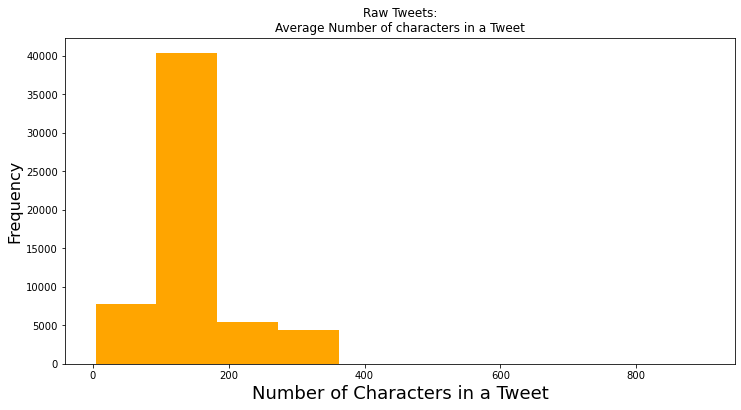

In [114]:
histogram_RawTweets()

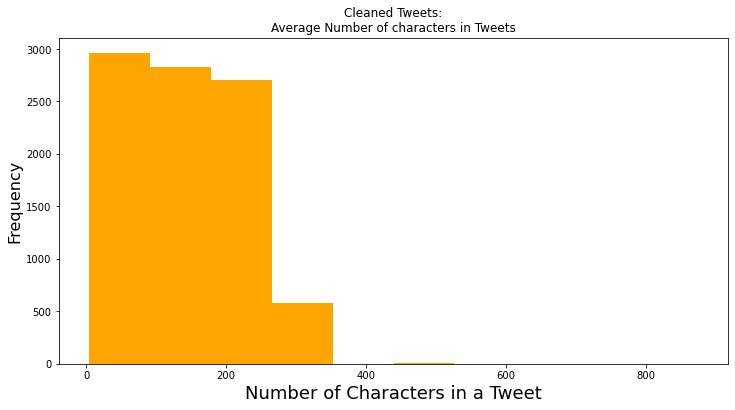

In [115]:
histogram_CleanTweets()

In [ ]:
# Visualizing Number of Tweets generated per day from Raw 

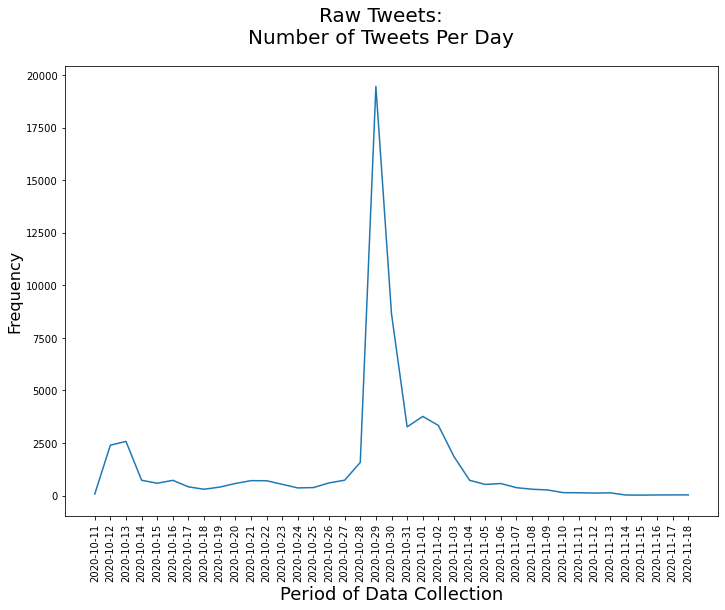

In [116]:
plot_Raw_TweetsCount_ByDays()

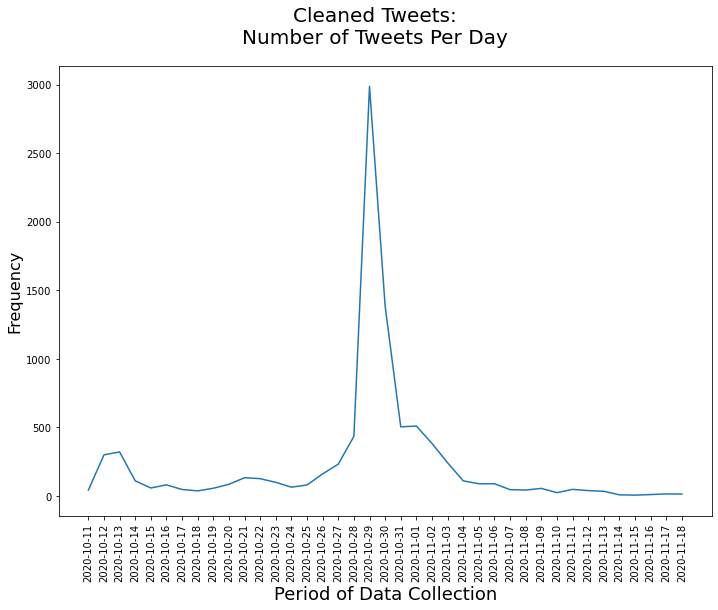

In [117]:
plot_Cleaned_TweetsCount_ByDays()

# Visualizing Tweets Semantic Features

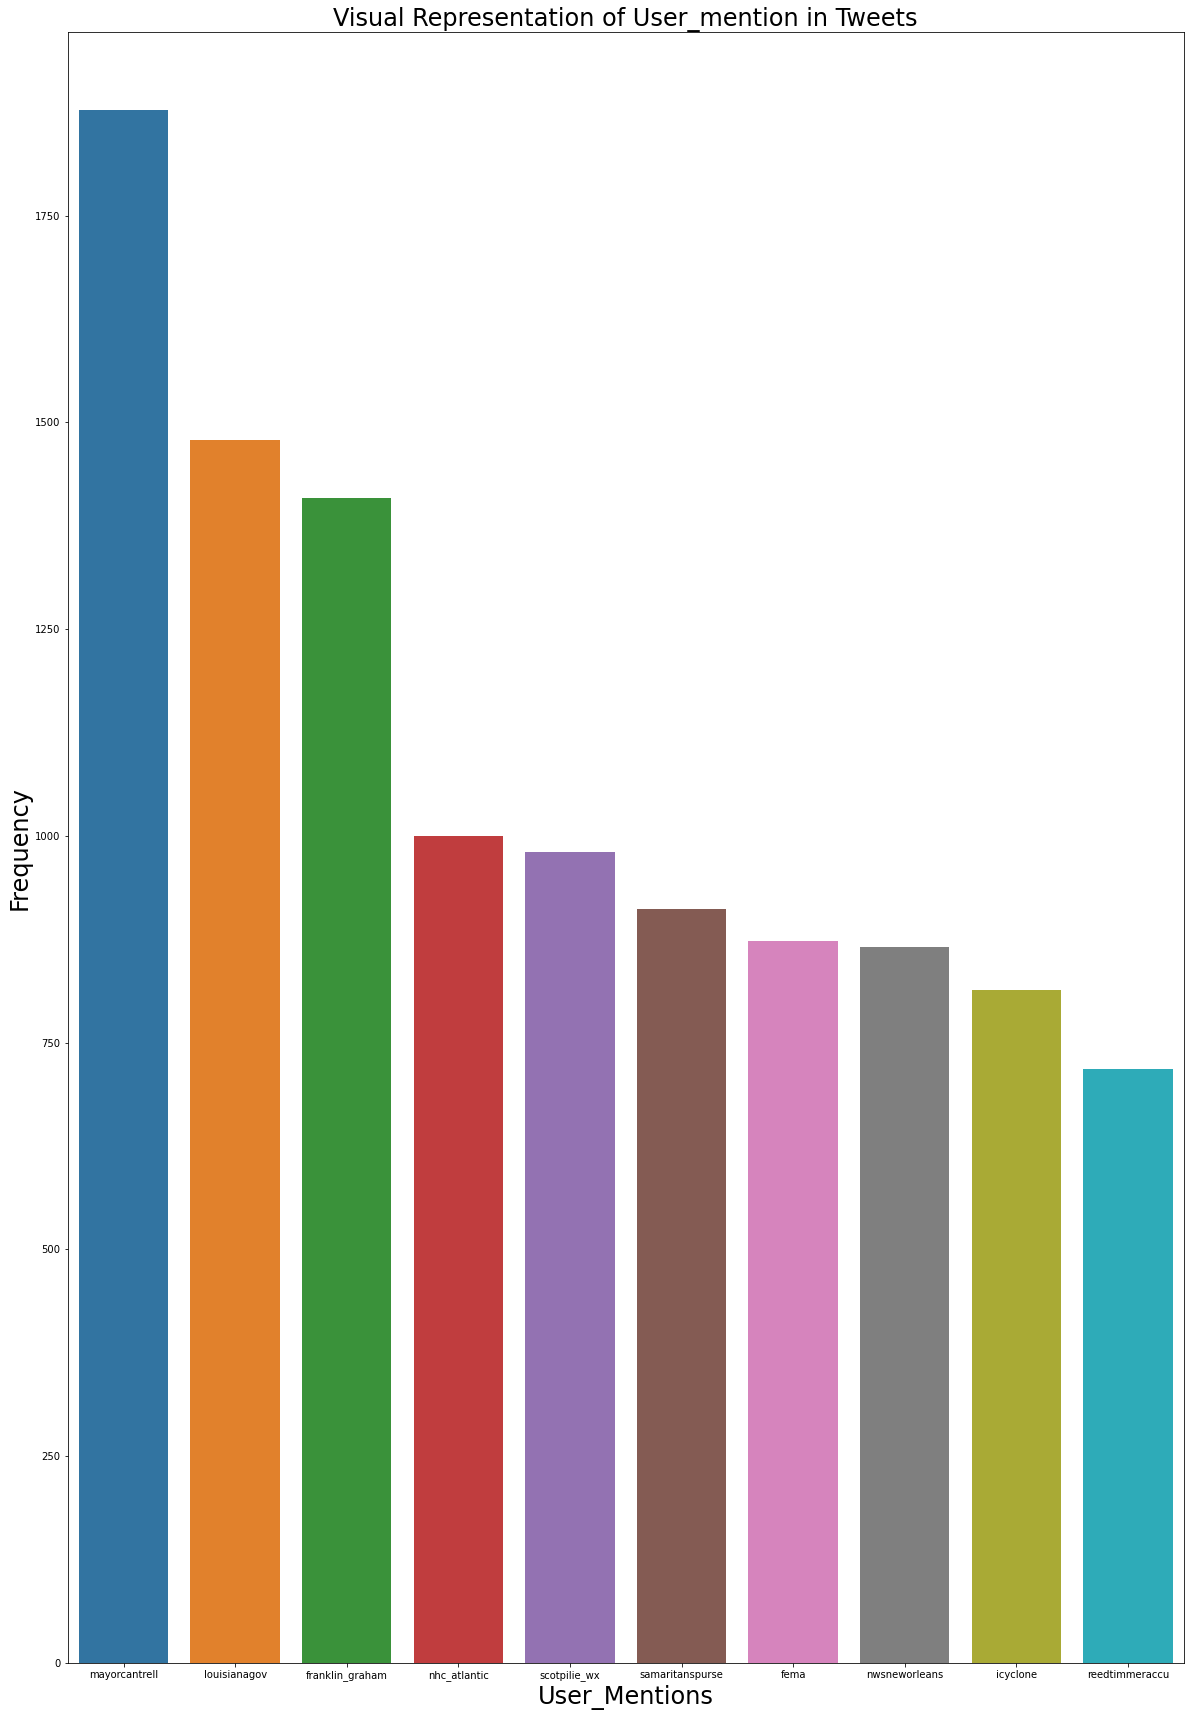

In [118]:
viewUserMention()

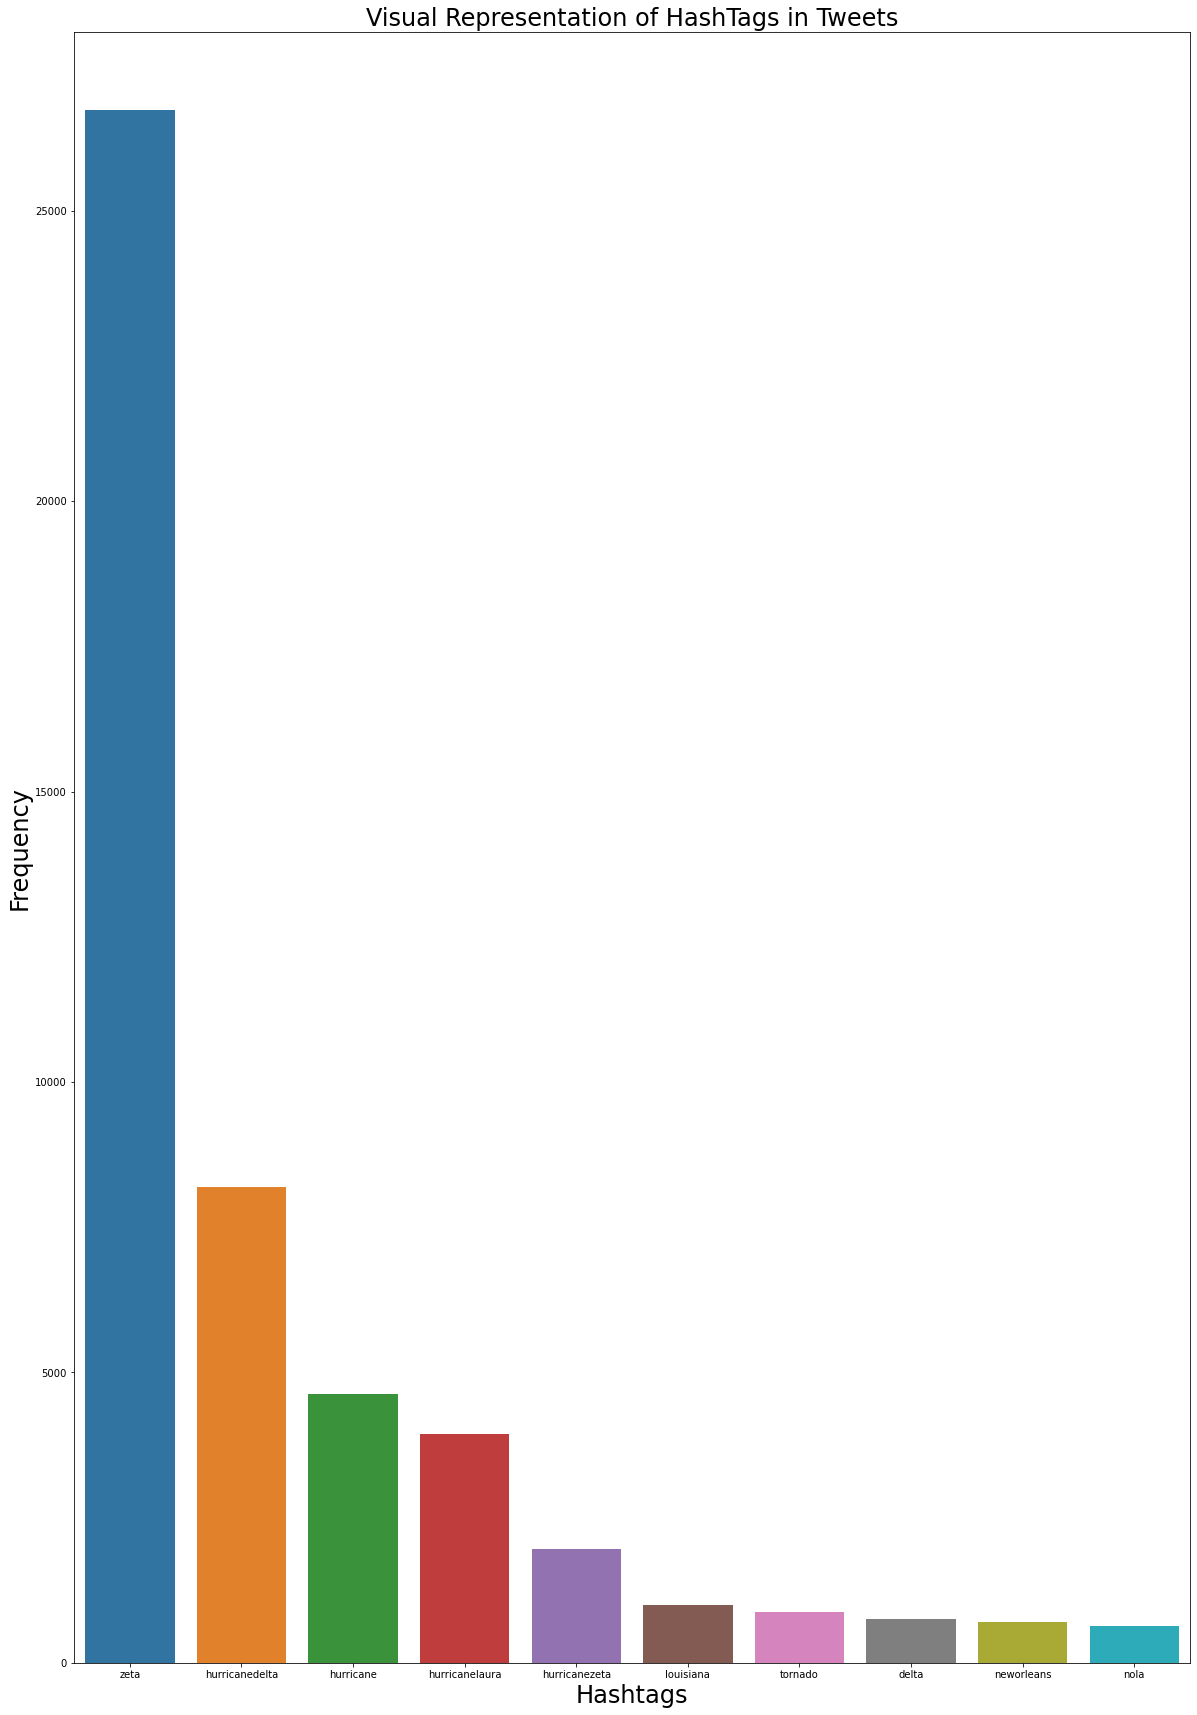

In [119]:
viewTopHashTags()

# Processing the raw tweets using function  get_tweet_content()

In [16]:
Tweets=get_tweet_content()

In [40]:
Tweets[0] #Sample of Raw vs Clean Tweet

{'TweetsID': '1216910000000000000',
 'RawTweets': 'We’re doing everything we can to get our students back in school safely and quickly post #hurricanelaura &amp; #hurricanedelta and are thankful to those who’ve helped already, but we need somebody who can get us tents or something ASAP #CatholicTwitter',
 'Cleaned_Tweets': 'were doing everything we can to get our students back in school safely and quickly post hurricanelaura amp hurricanedelta and are thankful to those whove helped already but we need somebody who can get us tents or something asap catholictwitter ',
 'User_Location': 'LOCATION',
 'Date': '24/10/2020 03:29',
 'Short_Date': '2020-10-24'}

In [18]:
Tweets_dataFrame=pd.DataFrame(Tweets)

In [19]:
processing_data=Tweets_dataFrame.copy()

In [20]:
processing_data.info() # 36, 727 Retweets and mull values were removed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21318 entries, 0 to 21317
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TweetsID        21318 non-null  object
 1   RawTweets       21318 non-null  object
 2   Cleaned_Tweets  21318 non-null  object
 3   User_Location   21318 non-null  object
 4   Date            21318 non-null  object
 5   Short_Date      21318 non-null  object
dtypes: object(6)
memory usage: 999.4+ KB


# Removing Duplicates

In [21]:
processing_data=processing_data.drop_duplicates(subset=['Cleaned_Tweets'],keep='first') #Removing by TweetsText Column

In [22]:
processing_data=processing_data.drop_duplicates(subset=['TweetsID'],keep='first') #Removing by TweetsText Column

# Performing check to show all duplicate tweets was removed

In [23]:
processing_data[processing_data.duplicated(['Cleaned_Tweets'], keep='first')]

,TweetsID,RawTweets,Cleaned_Tweets,User_Location,Date,Short_Date


In [24]:
processing_data[processing_data.duplicated(['TweetsID'], keep='first')]

,TweetsID,RawTweets,Cleaned_Tweets,User_Location,Date,Short_Date


In [25]:
processing_data.tail(2) # User_Location for serial no 14790 now reads 'LOCATION'

,TweetsID,RawTweets,Cleaned_Tweets,User_Location,Date,Short_Date
21316,242775960,This explains a lot. Good luck with the repai...,this explains a lot good luck with the repairs...,"Gulfport, MS",12/11/2020 00:22,2020-11-12
21317,1324380000000000000,"Can it really be ""Climate Change"" alone though...",can it really be climate change alone though l...,Jamaica,12/11/2020 00:15,2020-11-12


In [41]:
processing_data.info() #Distincts Tweets is 9,072. 12,245 duplicates have been removed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 21317
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TweetsID        9072 non-null   object
 1   RawTweets       9072 non-null   object
 2   Cleaned_Tweets  9072 non-null   object
 3   User_Location   9072 non-null   object
 4   Date            9072 non-null   object
 5   Short_Date      9072 non-null   object
dtypes: object(6)
memory usage: 496.1+ KB


In [ ]:
# Saving cleaned Tweets to CSV file 8766 distinct tweets

In [39]:
processing_data.to_csv('data/proData/processeddata.csv', index = False)

# Corresponding functions used in above experiments

In [7]:
def process_tweet(tweets):
    
    #for twit in tweets:      
    # Convert to lower case
    tweet= tweets.lower()
    # Replaces URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    # Replace @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', 'user_mention', tweet)
    # Replaces #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', 'RT', tweet)
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Strip space, " and ' from tweet
    tweet = re.sub(r'[^\w\s]','',tweet)
    # Replace emojis with either EMO_POS or EMO_NEG
    tweet = handle_emojis(tweet)
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    #tweet=[char for char in tweet if char not in string.punctuation]
    words = ''.join(tweet)
    tweet = words
    return tweet

In [8]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet

In [9]:
import csv
def get_tweet_content():
    #import csv
    from datetime import datetime
    lex1=[]
    
    reader = csv.reader(open('data/rawdata/Tweets.csv', 'r',encoding="utf8"))
    csvreader = csv.reader(reader)
    next(reader)
    for line in reader:
        lex={}
        TweetsID, TweetsText,User_Location,Date,S_Date = line
        lex['TweetsID']=str(TweetsID)
        lex['RawTweets']=TweetsText
        lex['Cleaned_Tweets']=TweetsText
        lex['User_Location']=User_Location
        lex['Date']=Date
        lex['Short_Date']=S_Date
    # ignore retweets 
        if (lex['User_Location']==''):        
            lex['User_Location']='LOCATION'
        if lex['Cleaned_Tweets'].startswith('RT') or len(lex['Cleaned_Tweets']) < 1:
                pass 
        else:
            lex['Cleaned_Tweets']=process_tweet(TweetsText)
            lex['RawTweets']=TweetsText
            lex1.append(lex)
    
    return lex1

In [113]:
def plot_Raw_TweetsCount_ByDays():
    ts_date = raw_Tweets['S_Date']
    ts_date = ts_date.tolist()
    ts_date_dict = dict(Counter(ts_date))
    tsdata = pd.DataFrame({'date' : list(ts_date_dict.keys()), 'count_tweets' : list(ts_date_dict.values())})
    tsdata = tsdata.sort_values('date')
    tsdata = tsdata.set_index('date')
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax.set_xticklabels(tsdata.index, rotation=90)
    fig.suptitle('Raw Tweets:\nNumber of Tweets Per Day', fontsize=20)
    plt.xlabel('Period of Data Collection', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)
    plt.plot(tsdata)
    fig.savefig('Cleaned Tweets:\nNumber of Tweets Per Day.jpg')

In [112]:
def plot_Cleaned_TweetsCount_ByDays():
    ts_date = processing_data['Short_Date']
    ts_date = ts_date.tolist()
    ts_date_dict = dict(Counter(ts_date))
    tsdata = pd.DataFrame({'date' : list(ts_date_dict.keys()), 'count_tweets' : list(ts_date_dict.values())})
    tsdata = tsdata.sort_values('date')
    tsdata = tsdata.set_index('date')
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax.set_xticklabels(tsdata.index, rotation=90)
    fig.suptitle('Cleaned Tweets:\nNumber of Tweets Per Day', fontsize=20)
    plt.xlabel('Period of Data Collection', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)
    plt.plot(tsdata)
    fig.savefig('Number of Tweets Per Day.jpg')

In [111]:
def histogram_RawTweets():
    length_raw = raw_Tweets['TweetsText'].str.len().plot.hist(color = 'orange', figsize = (12, 6))
    plt.xlabel('Number of Characters in a Tweet', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)
    plt.title("Raw Tweets:\nAverage Number of characters in a Tweet")

In [110]:
def histogram_CleanTweets():
    length_clean = processing_data['Cleaned_Tweets'].str.len().plot.hist(color = 'orange', figsize = (12, 6))
    plt.xlabel('Number of Characters in a Tweet', fontsize=18)
    plt.ylabel('Frequency', fontsize=16)
    plt.title("Cleaned Tweets:\nAverage Number of characters in Tweets")

In [103]:
#Collecting the hashtags
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
#tweet = re.sub(r'#(\S+)', r' \1 ', tweet)

In [60]:
#Collecting the hashtags
def usermention_extract(x):
    usermention = []
    
    for i in x:
        um = re.findall(r"@(\w+)", i)
        usermention.append(um)

    return usermention

In [43]:
# extracting user_mention in tweets

In [109]:
def viewUserMention():
    userMention = usermention_extract(raw_Tweets['TweetsText'])
    userMention = sum(userMention,[])
    userMention= [x.lower() for x in userMention if len(x)>1]
    count_userMention = dict(Counter(userMention))
    Dframe_userMention = pd.DataFrame({'UserNames': list(count_userMention.keys()),
                  'Count': list(count_userMention.values())})
    Dframe_userMention = Dframe_userMention.nlargest(columns="Count", n=10) 
    plt.figure(figsize=(20,30))
    ax = sns.barplot(data=Dframe_userMention, x= "UserNames", y = "Count")
    plt.ylabel('Frequency', fontsize=24)
    plt.xlabel('User_Mentions', fontsize=24)
    plt.title('Visual Representation of User_mention in Tweets', fontsize=24)

In [50]:
# extracting hashtags from tweets

In [108]:
def viewTopHashTags():
    hashTags = hashtag_extract(raw_Tweets['TweetsText'])
    hashTags = sum(hashTags,[])
    hashTags= [x.lower() for x in hashTags if len(x)>1]
    count_hashTags = dict(Counter(hashTags))
    Dframe_hashTags = pd.DataFrame({'Hashtag': list(count_hashTags.keys()),
                  'Count': list(count_hashTags.values())})
    Dframe_hashTags = Dframe_hashTags.nlargest(columns="Count", n=10) 
    plt.figure(figsize=(20,30))
    ax = sns.barplot(data=Dframe_hashTags, x= "Hashtag", y = "Count")
    plt.ylabel('Frequency', fontsize=24)
    plt.xlabel('Hashtags', fontsize=24)
    plt.title('Visual Representation of HashTags in Tweets', fontsize=24)